Dataset 1

Lendo o dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print('oi')

oi


Quais gêneros tem mais jogos ?

In [3]:
vg['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

Quais anos tiveram mais lançamentos ?

In [4]:
vg['Year_of_Release'].value_counts()

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

Os cinco anos com mais lançamentos, com estes lançamentos divididos por gênero

In [5]:
cincoAnos = vg['Year_of_Release'].value_counts().head(5)
vg_cincoAnos = vg[vg['Year_of_Release'].isin(cincoAnos.index)]

In [6]:
genero_cinco_ano = vg_cincoAnos.groupby(['Year_of_Release', 'Genre']).size()
genero_cinco_ano_df = genero_cinco_ano.reset_index(name='Count')
print(genero_cinco_ano_df)

    Year_of_Release         Genre  Count
0            2007.0        Action    210
1            2007.0     Adventure     83
2            2007.0      Fighting     50
3            2007.0          Misc    151
4            2007.0      Platform     42
5            2007.0        Puzzle     66
6            2007.0        Racing     84
7            2007.0  Role-Playing    103
8            2007.0       Shooter     85
9            2007.0    Simulation     90
10           2007.0        Sports    166
11           2007.0      Strategy     67
12           2008.0        Action    221
13           2008.0     Adventure    166
14           2008.0      Fighting     56
15           2008.0          Misc    212
16           2008.0      Platform     62
17           2008.0        Puzzle     64
18           2008.0        Racing     82
19           2008.0  Role-Playing    112
20           2008.0       Shooter     83
21           2008.0    Simulation    119
22           2008.0        Sports    200
23           200

Faça um gráfico por total de vendas globais

In [7]:
global_sales = vg['Global_Sales'].value_counts()
total_global_sales = global_sales.sum()
print(total_global_sales)
# sum_total_global_sales = total_global_sales.sum()
# print(sum_total_global_sales)

16719


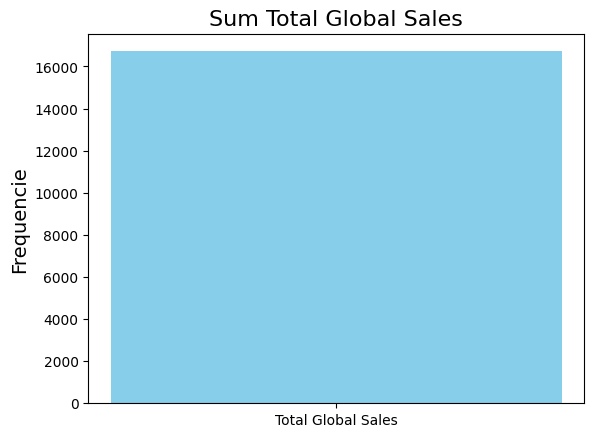

In [8]:
plt.bar(['Total Global Sales'], [total_global_sales], color='skyblue')
plt.title('Sum Total Global Sales', fontsize=16)
plt.ylabel('Frequencie', fontsize=14)
plt.show()

Para cada ano, qual o gênero com mais lançamentos daquele ano

In [9]:
genero_grupo_lancamento = vg.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Launch_Count')
genero_mais_lancado = genero_grupo_lancamento.loc[genero_grupo_lancamento.groupby('Year_of_Release')['Launch_Count'].idxmax()]
print(genero_mais_lancado)

     Year_of_Release         Genre  Launch_Count
2             1980.0          Misc             4
5             1981.0        Action            25
12            1982.0        Action            18
19            1983.0        Action             7
29            1984.0        Puzzle             3
35            1985.0      Platform             4
40            1986.0        Action             6
52            1987.0        Sports             4
54            1988.0      Platform             4
64            1989.0        Puzzle             5
68            1990.0        Action             3
85            1991.0        Sports             7
89            1992.0      Fighting             7
101           1993.0      Fighting            11
113           1994.0      Fighting            22
125           1995.0      Fighting            29
145           1996.0        Sports            52
157           1997.0        Sports            46
169           1998.0        Sports            70
181           1999.0

Para cada ano, qual foi o gênero mais vendido daquele ano

In [10]:
genero_grupo_vendas = vg.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
genero_mais_vendido = genero_grupo_vendas.loc[genero_grupo_vendas.groupby('Year_of_Release')['Global_Sales'].idxmax()]
print(genero_mais_vendido)

     Year_of_Release         Genre  Global_Sales
3             1980.0       Shooter          7.07
5             1981.0        Action         14.84
15            1982.0        Puzzle         10.03
22            1983.0      Platform          6.93
31            1984.0       Shooter         31.10
35            1985.0      Platform         43.17
40            1986.0        Action         13.74
48            1987.0      Fighting          5.42
54            1988.0      Platform         27.73
64            1989.0        Puzzle         37.75
69            1990.0      Platform         22.97
79            1991.0      Platform          7.64
89            1992.0      Fighting         15.25
103           1993.0      Platform         18.67
115           1994.0      Platform         28.74
127           1995.0      Platform         16.69
142           1996.0  Role-Playing         43.96
153           1997.0        Racing         31.91
169           1998.0        Sports         41.79
178           1999.0

Um gráfico contendo para cada plataforma, o número de vendas da mesma.

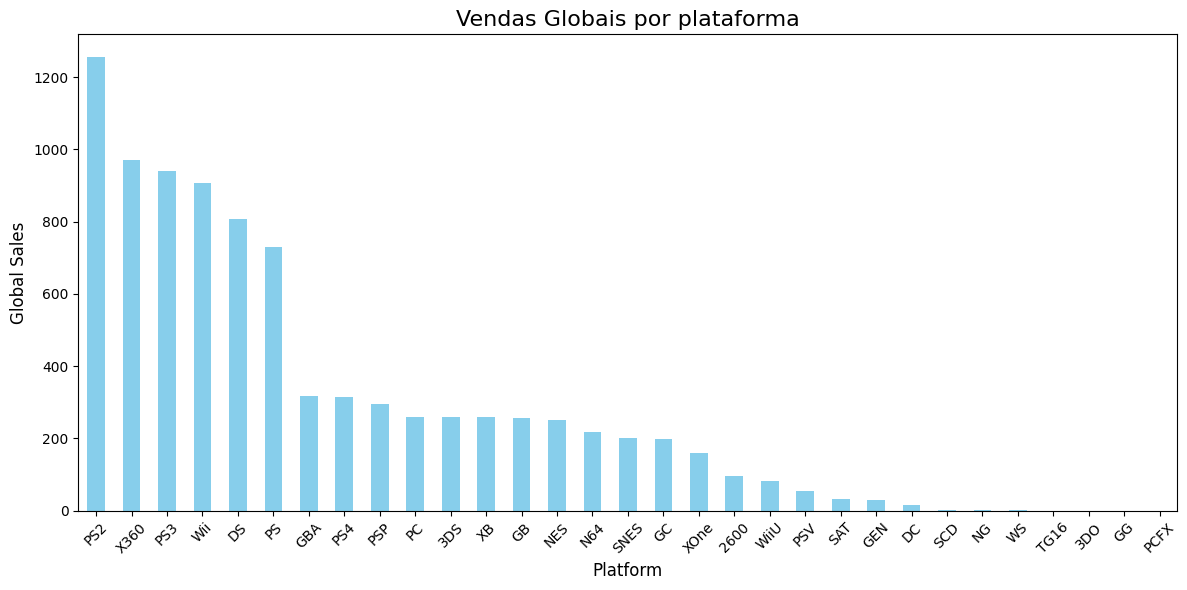

In [11]:
vendas_por_plataforma = vg.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
vendas_por_plataforma.plot(kind='bar', color='skyblue')

plt.title('Vendas Globais por plataforma', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Faça uma tabela comparando, para cada gênero, as vendas globais, na américa do norte, europa e japão.

In [12]:
vendas_globais_por_genero = vg[['Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]

vendas_globais_por_genero = vendas_globais_por_genero.groupby('Genre').sum().reset_index()

vendas_globais_por_genero.to_csv('vendas_globais_por_genero.csv', index=False)

vendasDf = pd.read_csv('vendas_globais_por_genero.csv')
vendasDf

,Genre,Global_Sales,NA_Sales,EU_Sales,JP_Sales
0,Action,1745.27,879.01,519.13,161.44
1,Adventure,237.69,105.26,63.54,52.30
2,Fighting,447.48,223.36,100.33,87.48
3,Misc,803.18,407.27,212.74,108.11
4,Platform,828.08,445.50,200.35,130.83
5,Puzzle,243.02,122.87,50.01,57.31
6,Racing,728.90,359.35,236.51,56.71
7,Role-Playing,934.40,330.81,188.71,355.46
8,Shooter,1052.94,592.24,317.34,38.76
9,Simulation,390.42,182.19,113.52,63.80


Faça um gráfico de vendas por publisher

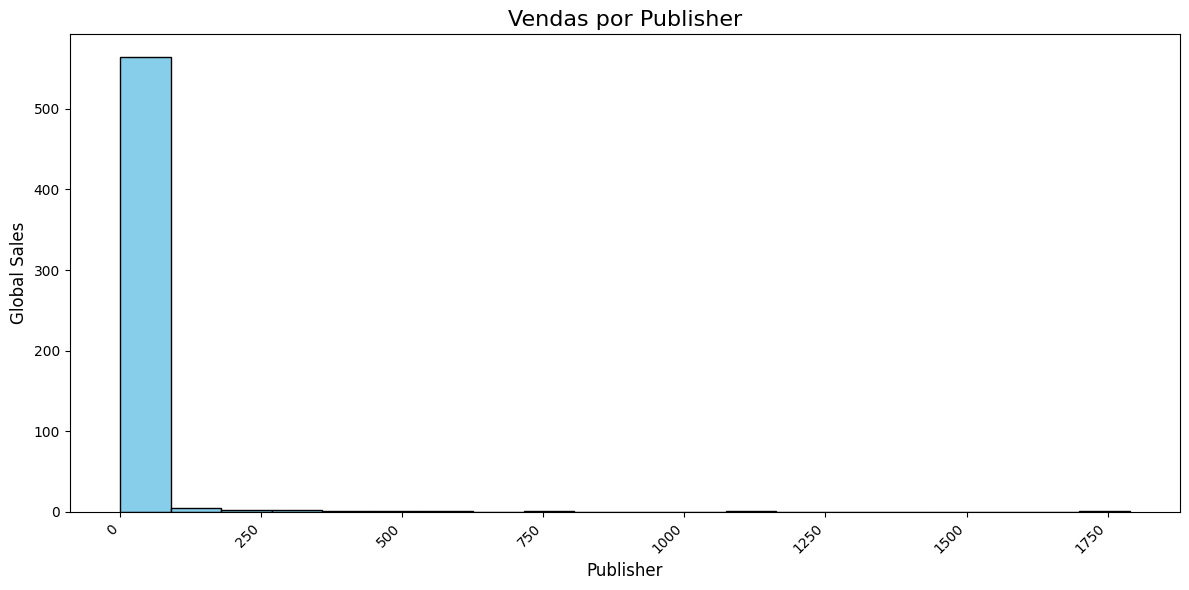

In [13]:
vendas_publisher = vg[['Publisher', 'Global_Sales']]

vendas_publisher = vendas_publisher.groupby('Publisher').sum().reset_index()

vendas_publisher = vendas_publisher.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.hist(vendas_publisher['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Vendas por Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Faça uma tabela onde, para cada ano é listada a publisher com mais vendas globais naquele ano

In [14]:
vendas_por_ano_publisher = vg[['Year_of_Release', 'Publisher', 'Global_Sales']]

vendas_por_ano_publisher = vendas_por_ano_publisher.groupby(['Year_of_Release', 'Publisher']).sum().reset_index()

publisher_lider = vendas_por_ano_publisher.loc[vendas_por_ano_publisher.groupby('Year_of_Release')['Global_Sales'].idxmax()]

print(publisher_lider)


      Year_of_Release                    Publisher  Global_Sales
1              1980.0                        Atari          8.36
3              1981.0                   Activision          8.50
19             1982.0                        Atari         19.43
36             1983.0                     Nintendo         10.96
41             1984.0                     Nintendo         45.56
47             1985.0                     Nintendo         49.95
53             1986.0                     Nintendo         16.18
60             1987.0                     Nintendo         11.95
67             1988.0                     Nintendo         36.44
75             1989.0                     Nintendo         63.88
82             1990.0                     Nintendo         35.49
97             1991.0                     Nintendo         15.97
114            1992.0                     Nintendo         38.11
138            1993.0                     Nintendo         20.04
180            1994.0    

Dataset 2

In [15]:
filmes_marvel = pd.read_csv('../../../Downloads/Marvel_Movies_Dataset.csv')
filmes_marvel.head(25)

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6
5,5,The Avengers,Joss Whedon,NaN,2012-05-04 00:00:00,8.0,69,91,91,3.7,A+,225.0,623.4,1521.0
6,6,Iron Man 3,Shane Black,NaN,2013-05-03 00:00:00,7.1,62,79,78,3.0,A,200.0,409.0,1215.0
7,7,Thor: The Dark World,Alan Taylor,NaN,2013-11-08 00:00:00,6.7,54,67,75,2.2,A-,272.0,206.4,644.8
8,8,Captain America: The Winter Soldier,Anthony Russo,Joe Russo,2014-04-04 00:00:00,7.7,70,90,92,3.7,A,177.0,259.8,714.4
9,9,Guardians of the Galaxy,James Gunn,NaN,2014-08-01 00:00:00,8.0,76,92,92,3.8,A,196.0,333.7,773.4


Qual filme teve o maior orçamento?

In [16]:
filme_maior_orcamento = filmes_marvel.loc[filmes_marvel['Budget (in million $)'].idxmax()]
print(filme_maior_orcamento)

Index                                                                  18
Title                                              Avengers: Infinity War
Director (1)                                                Anthony Russo
Director (2)                                                    Joe Russo
Release Date (DD-MM-YYYY)                             2018-04-27 00:00:00
IMDb (scored out of 10)                                               8.4
IMDB Metascore (scored out of 100)                                     68
Rotten Tomatoes - Critics (scored out of 100%)                         85
Rotten Tomatoes - Audience (scored out of 100%)                        92
Letterboxd (scored out of 5)                                          4.0
CinemaScore (grades A+ to F)                                            A
Budget (in million $)                                               400.0
Domestic Gross (in million $)                                       678.8
Worldwide Gross (in million $)        

Qual é a média dos valores de IMDb para todos os filmes?

In [17]:
media_IMDB = filmes_marvel['IMDb (scored out of 10)'].mean()
print(media_IMDB)

7.2441176470588236


Quantos filmes possuem uma pontuação de Rotten Tomatoes - Critics maior que 80%?

In [18]:
filmes_rotten_maior_80 = filmes_marvel[filmes_marvel['Rotten Tomatoes - Critics (scored out of 100%)'] > 80]

quantidade = filmes_rotten_maior_80.shape[0]

print(f"Número de filmes com pontuação de Rotten Tomatoes - Critics maior que 80%: {quantidade}")


Número de filmes com pontuação de Rotten Tomatoes - Critics maior que 80%: 19


Quais diretores (diretor principal ou secundário) dirigiram mais de um filme no dataset?

In [19]:
filmes_marvel['Directors'] = filmes_marvel['Director (1)'] + ',' + filmes_marvel['Director (2)']

diretores = filmes_marvel['Directors'].str.split(',').explode()

diretores_count = diretores.value_counts()

diretores_multiplos = diretores_count[diretores_count > 1]

print("Diretores que dirigiram mais de um filme no dataset")
print(diretores_multiplos)


Diretores que dirigiram mais de um filme no dataset
Directors
Anthony Russo    4
Joe Russo        4
Name: count, dtype: int64


Qual é a correlação entre o orçamento e o lucro bruto doméstico?

In [20]:
correlacao = filmes_marvel['Budget (in million $)'].corr(filmes_marvel['Domestic Gross (in million $)'])

print(correlacao)

0.3572802968186996


Quais filmes obtiveram um CinemaScore "A+"?

In [21]:
colunas_relevantes = ['Title', 'Director (1)', 'Director (2)', 'Release Date (DD-MM-YYYY)', 'IMDb (scored out of 10)', 'Rotten Tomatoes - Critics (scored out of 100%)']

filmes_cinemascore_A = filmes_marvel[filmes_marvel['CinemaScore (grades A+ to F)'] == 'A+']

filmes_cinemascore_A_formatado = filmes_cinemascore_A[colunas_relevantes]

print(filmes_cinemascore_A_formatado.to_string(index=False))

                  Title  Director (1) Director (2) Release Date (DD-MM-YYYY)  IMDb (scored out of 10)  Rotten Tomatoes - Critics (scored out of 100%)
           The Avengers   Joss Whedon          NaN       2012-05-04 00:00:00                      8.0                                              91
          Black Panther  Ryan Coogler          NaN       2018-02-16 00:00:00                      7.3                                              96
      Avengers: Endgame Anthony Russo    Joe Russo       2019-04-26 00:00:00                      8.4                                              94
Spider-Man: No Way Home     Jon Watts          NaN       2021-12-17 00:00:00                      8.2                                              93


Qual foi o filme com a maior pontuação no Letterboxd?

In [22]:
indice_max_letterboxd = filmes_marvel['Letterboxd (scored out of 5)'].idxmax()

filme_max_letterboxd = filmes_marvel.loc[indice_max_letterboxd]

print(filme_max_letterboxd)

Index                                                                   18
Title                                               Avengers: Infinity War
Director (1)                                                 Anthony Russo
Director (2)                                                     Joe Russo
Release Date (DD-MM-YYYY)                              2018-04-27 00:00:00
IMDb (scored out of 10)                                                8.4
IMDB Metascore (scored out of 100)                                      68
Rotten Tomatoes - Critics (scored out of 100%)                          85
Rotten Tomatoes - Audience (scored out of 100%)                         92
Letterboxd (scored out of 5)                                           4.0
CinemaScore (grades A+ to F)                                             A
Budget (in million $)                                                400.0
Domestic Gross (in million $)                                        678.8
Worldwide Gross (in milli

Quantos filmes têm um lucro bruto mundial superior a 500 milhões de dólares?

In [23]:
filmes_lucro_superior = filmes_marvel[filmes_marvel['Worldwide Gross (in million $)'] > 500]

qtd_filmes = len(filmes_lucro_superior)

print(qtd_filmes)

26


Qual foi o filme mais bem avaliado em Rotten Tomatoes - Critics e Rotten Tomatoes - Audience juntos?

In [24]:
filmes_marvel['Total_Rotten_Tomatoes'] = filmes_marvel['Rotten Tomatoes - Critics (scored out of 100%)'] + filmes_marvel['Rotten Tomatoes - Audience (scored out of 100%)']

indice_max_avaliacao = filmes_marvel['Total_Rotten_Tomatoes'].idxmax()

filme_max_avaliacao = filmes_marvel.loc[indice_max_avaliacao]

print(filme_max_avaliacao)

Index                                                                   26
Title                                              Spider-Man: No Way Home
Director (1)                                                     Jon Watts
Director (2)                                                           NaN
Release Date (DD-MM-YYYY)                              2021-12-17 00:00:00
IMDb (scored out of 10)                                                8.2
IMDB Metascore (scored out of 100)                                      71
Rotten Tomatoes - Critics (scored out of 100%)                          93
Rotten Tomatoes - Audience (scored out of 100%)                         98
Letterboxd (scored out of 5)                                           3.8
CinemaScore (grades A+ to F)                                            A+
Budget (in million $)                                                200.0
Domestic Gross (in million $)                                        814.9
Worldwide Gross (in milli

Qual é a distribuição dos orçamentos dos filmes (mínimo, máximo, quartis)?

In [25]:
estatistica_orcamento = filmes_marvel['Budget (in million $)'].describe()
print(estatistica_orcamento)

count     34.000000
mean     229.523529
std       69.004243
min      140.000000
25%      183.750000
50%      200.000000
75%      250.000000
max      400.000000
Name: Budget (in million $), dtype: float64


Quais são os 5 filmes mais antigos no dataset?

In [26]:
filmes_marvel['Release Date (DD-MM-YYYY)'] = pd.to_datetime(filmes_marvel['Release Date (DD-MM-YYYY)'], errors='coerce')

filmes_mais_antigos = filmes_marvel.sort_values(by='Release Date (DD-MM-YYYY)').head(5)

print(filmes_mais_antigos[['Title', 'Release Date (DD-MM-YYYY)']])

                                Title Release Date (DD-MM-YYYY)
0                            Iron Man                2008-05-02
1                 The Incredible Hulk                2008-06-13
2                          Iron Man 2                2010-05-07
3                                Thor                2011-05-06
4  Captain America: The First Avenger                2011-07-22


Qual é a relação entre o IMDb Metascore e o Rotten Tomatoes - Critics?

In [27]:
correlacao_imbd_rotten = filmes_marvel[['IMDB Metascore (scored out of 100)', 'Rotten Tomatoes - Critics (scored out of 100%)']].corr()

print(correlacao_imbd_rotten)

                                                IMDB Metascore (scored out of 100)  \
IMDB Metascore (scored out of 100)                                        1.000000   
Rotten Tomatoes - Critics (scored out of 100%)                            0.890527   

                                                Rotten Tomatoes - Critics (scored out of 100%)  
IMDB Metascore (scored out of 100)                                                    0.890527  
Rotten Tomatoes - Critics (scored out of 100%)                                        1.000000  


Quais filmes tiveram mais sucesso mundial (Worldwide Gross) em relação ao seu orçamento?

In [28]:
filmes_marvel['Worldwide Gross/Budget'] = filmes_marvel['Worldwide Gross (in million $)'] / filmes_marvel['Budget (in million $)']

filmes_mais_sucesso = filmes_marvel.sort_values(by='Worldwide Gross/Budget', ascending=False).head(10)

print(filmes_mais_sucesso[['Title', 'Budget (in million $)', 'Worldwide Gross (in million $)', 'Worldwide Gross/Budget']])


                        Title  Budget (in million $)  \
26    Spider-Man: No Way Home                  200.0   
22  Spider-Man: Far From Home                  160.0   
21          Avengers: Endgame                  400.0   
5                The Avengers                  225.0   
17              Black Panther                  200.0   
33       Deadpool & Wolverine                  200.0   
20             Captain Marvel                  175.0   
6                  Iron Man 3                  200.0   
18     Avengers: Infinity War                  400.0   
15     Spider-Man: Homecoming                  175.0   

    Worldwide Gross (in million $)  Worldwide Gross/Budget  
26                          1952.0                9.760000  
22                          1133.0                7.081250  
21                          2799.0                6.997500  
5                           1521.0                6.760000  
17                          1350.0                6.750000  
33               

Qual foi a média de Rotten Tomatoes - Audience para os filmes lançados antes de 2010?


In [31]:
filmes_marvel['Release Date (DD-MM-YYYY)'] = pd.to_datetime(filmes_marvel['Release Date (DD-MM-YYYY)'], errors='coerce')

filmes_antes_2010 = filmes_marvel[filmes_marvel['Release Date (DD-MM-YYYY)'].dt.year < 2010]

media_rotten = filmes_antes_2010['Rotten Tomatoes - Audience (scored out of 100%)'].mean()

print(media_rotten)

80.0


Quantos filmes no dataset possuem dois diretores listados?

In [32]:
filmes_dois_diretores = filmes_marvel[filmes_marvel['Director (2)'].notna()]

qtd_filmes_dois_diretores = filmes_dois_diretores.shape[0]

print(qtd_filmes_dois_diretores)

5
